# TASK #1: UNDERSTAND THE PROBLEM STATEMENT/GOAL



- This dataset contains weekly sales from 99 departments belonging to 45 different stores. 
- Our aim is to forecast weekly sales from a particular department.
- The objective of this case study is to forecast weekly retail store sales based on historical data.
- The data contains holidays and promotional markdowns offered by various stores and several departments throughout the year.
- Markdowns are crucial to promote sales especially before key events such as Super Bowl, Christmas and Thanksgiving. 
- Developing accurate model will enable make informed decisions and make recommendations to improve business processes in the future. 
- The data consists of three sheets: 
    - Stores
    - Features
    - Sales
- Data Source : https://www.kaggle.com/manjeetsingh/retaildataset

# TASK #2: IMPORT DATASET AND LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile


In [3]:
df = pd.read_csv('../data/data_processed.csv')
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,month,Type,Size
0,1,1,2010-05-02,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,5,A,151315
1,1,2,2010-05-02,50605.27,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,5,A,151315
2,1,3,2010-05-02,13740.12,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,5,A,151315
3,1,4,2010-05-02,39954.04,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,5,A,151315
4,1,5,2010-05-02,32229.38,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,5,A,151315


In [4]:
# Drop the date
y = df['Weekly_Sales'] # target
X = df.drop(columns = ['Weekly_Sales', 'Date']) # features

In [5]:
y

0         24924.50
1         50605.27
2         13740.12
3         39954.04
4         32229.38
            ...   
421565     2487.80
421566     5203.31
421567    56017.47
421568     6817.48
421569     1076.80
Name: Weekly_Sales, Length: 421570, dtype: float64

In [6]:
X.dtypes

Store             int64
Dept              int64
IsHoliday         int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
month             int64
Type             object
Size              int64
dtype: object

In [7]:
# encode the Type column
X['Type'].unique()

array(['A', 'B', 'C'], dtype=object)

In [8]:
X[X['Type'] == 'A'] = 0
X[X['Type'] == 'B'] = 1
X[X['Type'] == 'C'] = 2

In [9]:
X['Type'].unique()

array([0, 1, 2], dtype=object)

In [10]:
X.dtypes

Store             int64
Dept              int64
IsHoliday         int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
month             int64
Type             object
Size              int64
dtype: object

# Use Random Forest Feature Importance for Feature Selection

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
from sklearn.ensemble import RandomForestRegressor

In [14]:
feature_names = list(X.columns)
feature_names

['Store',
 'Dept',
 'IsHoliday',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment',
 'month',
 'Type',
 'Size']

In [15]:
%%time
# fit random forest regressor with default values to select features
forest = RandomForestRegressor(random_state=0)
forest.fit(X_train, y_train)

CPU times: user 6.35 s, sys: 91 ms, total: 6.44 s
Wall time: 6.47 s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [16]:
%%time
# determine permutation importance robust against features with high cardinality
from sklearn.inspection import permutation_importance

result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

forest_importances = pd.Series(result.importances_mean, index=feature_names)

CPU times: user 1.05 s, sys: 68.7 ms, total: 1.12 s
Wall time: 40.6 s


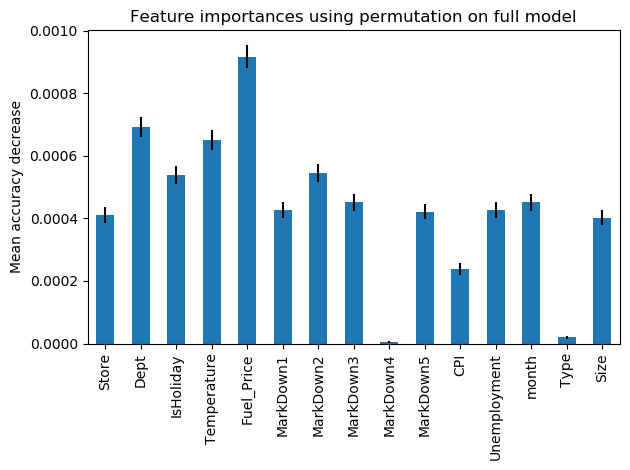

In [17]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [18]:
X.Type.unique()

array([0, 1, 2], dtype=object)

In [19]:
X.MarkDown4.unique()

array([0., 1., 2.])